# Week 9 - Introduction to Web Scraping

---

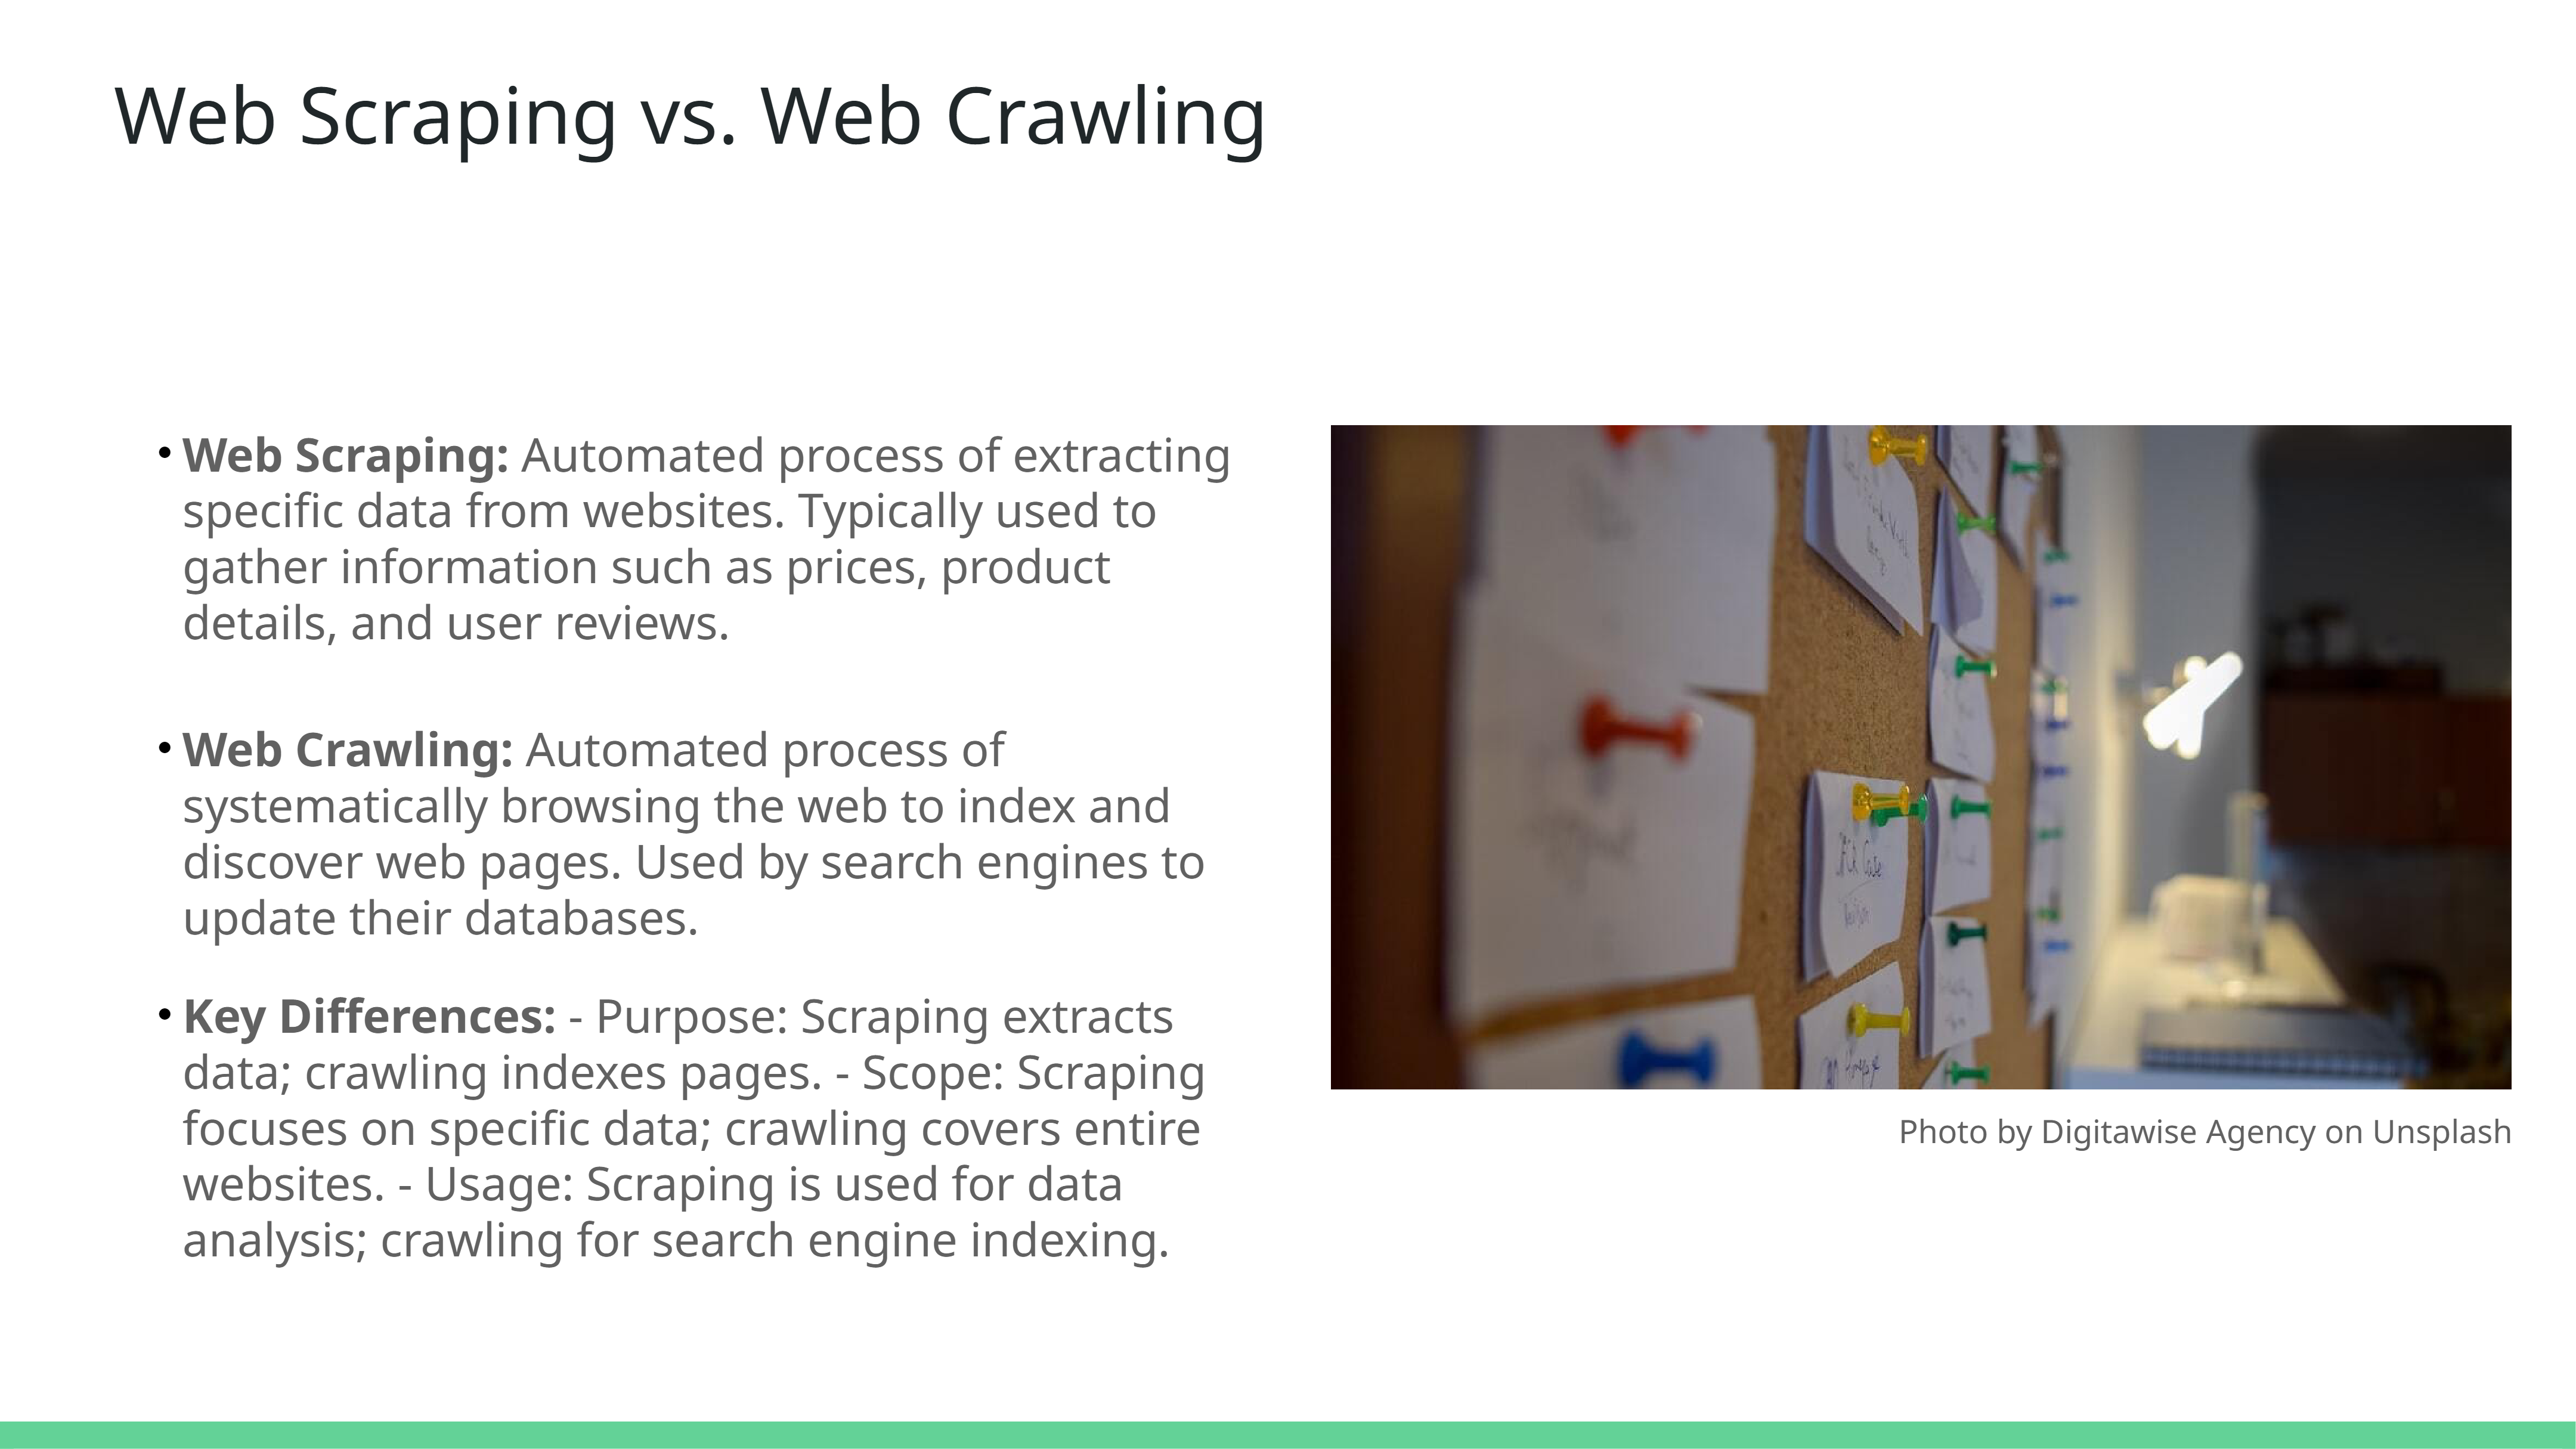
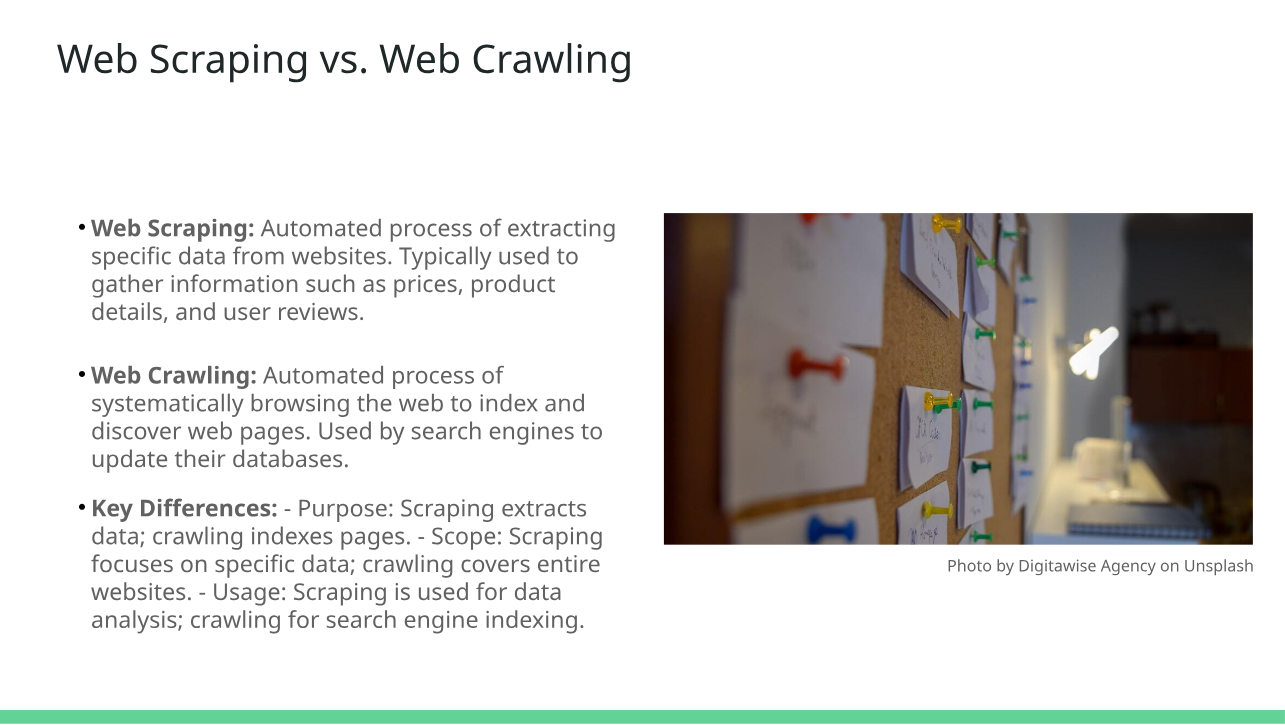

# Setting Up the Environment

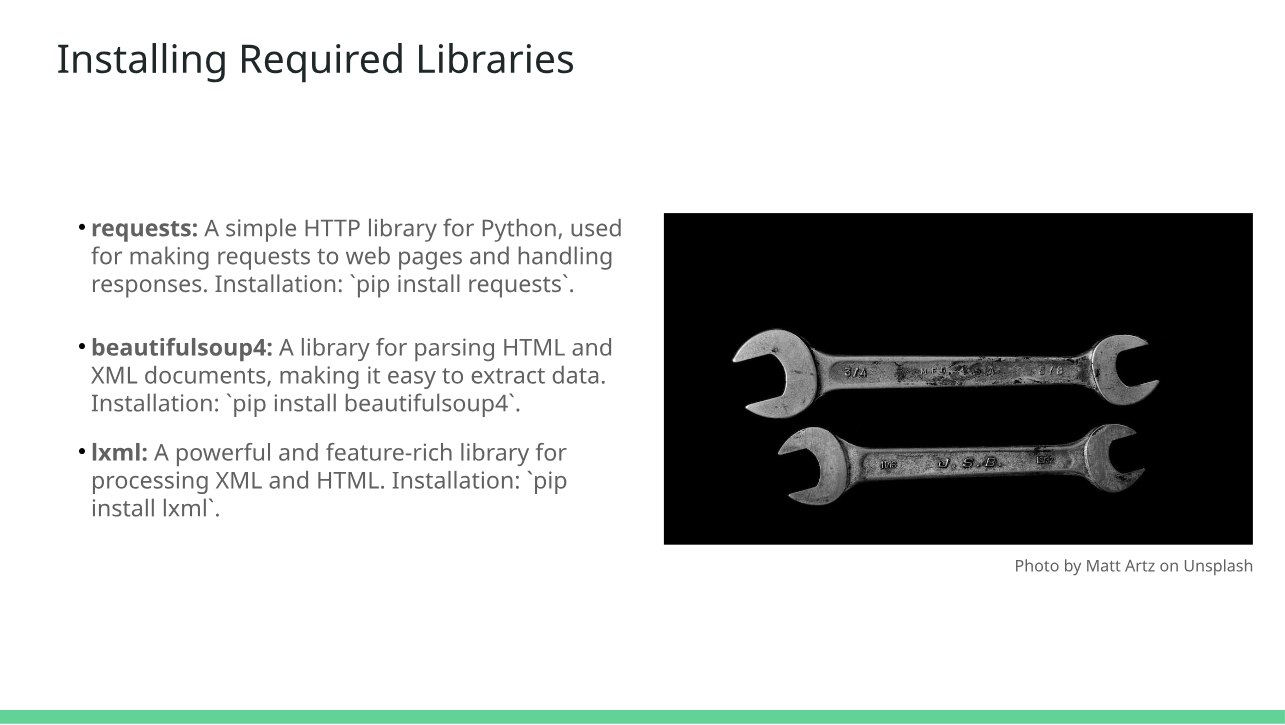

In [ ]:
%pip install requests beautifulsoup4 lxml

In [ ]:
import requests

url = 'https://www.i-com.it/pubblicazioni/i-nostri-articoli/page/1/'
response = requests.get(url)
print(response.text[:500])  # Print the first 500 characters of the response text to verify the content

In [ ]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(response.text, 'html.parser')
print(soup.prettify())  # Print the first 500 characters of the prettified HTML to verify the content

In [ ]:
articles = soup.find_all('div', class_='td_module_wrap')
print(len(articles))  # Print the number of articles found

In [ ]:
# Starting empty data storage
data = []

In [ ]:
titles = []
for article in articles:
    title_element = article.find('h3', class_='entry-title td-module-title')
    title = title_element.get_text(strip=True) if title_element else ''
    titles.append(title)

print(titles)  # Print extracted titles

In [ ]:
release_dates = []
for article in articles:
    release_date_element = article.find('time', class_='entry-date')
    release_date = release_date_element.get_text(strip=True) if release_date_element else ''
    release_dates.append(release_date)

print(release_dates)  # Print extracted release dates

In [ ]:
types_of_page = []
writers = []
for article in articles:
    meta_info_element = article.find('div', class_='td-module-meta-info')
    type_of_page = ''
    writer_name = ''
    
    if meta_info_element:
        meta_info_lines = [line.strip() for line in meta_info_element.stripped_strings]
        if len(meta_info_lines) >= 3:
            type_of_page = meta_info_lines[-2]
            writer_name = meta_info_lines[-1]
    
    types_of_page.append(type_of_page)
    writers.append(writer_name)

print(types_of_page)  # Print extracted types of page
print(writers)  # Print extracted writer names

In [ ]:
links = []
for article in articles:
    title_element = article.find('h3', class_='entry-title td-module-title')
    link_element = title_element.find('a') if title_element else None
    link = link_element['href'] if link_element else ''
    links.append(link)

print(links)  # Print extracted links

In [ ]:
for i in range(len(articles)):
    data.append([titles[i], release_dates[i], types_of_page[i], writers[i], links[i]])

print(data)  # Print combined data

In [ ]:
import csv

with open('articles.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Title', 'Release Date', 'Type of Page', 'Writer', 'Link'])
    writer.writerows(data)

print('Data successfully saved to articles.csv')

# Other way

In [ ]:
# Extracting all articles
articles = soup.find_all('div', class_='td_module_wrap')

data = []

for article in articles:
    # Extracting the title
    title_element = article.find('h3', class_='entry-title td-module-title')
    title = title_element.get_text(strip=True) if title_element else ''

    # Extracting the release date
    release_date_element = article.find('time', class_='entry-date')
    release_date = release_date_element.get_text(strip=True) if release_date_element else ''

    # Extracting the type of the page and writer's name
    meta_info_element = article.find('div', class_='td-module-meta-info')
    type_of_page = ''
    writer_name = ''

    if meta_info_element:
        meta_info_lines = [line.strip() for line in meta_info_element.stripped_strings]
        if len(meta_info_lines) >= 3:
            type_of_page = meta_info_lines[-2]
            writer_name = meta_info_lines[-1]

    # Extracting the link
    link_element = title_element.find('a') if title_element else None
    link = link_element['href'] if link_element else ''

    data.append([title, release_date, type_of_page, writer_name, link])

    print(f'Title: {title}')
    print(f'Release Date: {release_date}')
    print(f'Type of Page: {type_of_page}')
    print(f'Writer: {writer_name}')
    print(f'Link: {link}')
    print('---')

In [ ]:
import csv

with open('articles.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Title', 'Release Date', 'Type of Page', 'Writer', 'Link'])
    writer.writerows(data)

print('Data successfully saved to articles.csv')

In [ ]:
import requests
from bs4 import BeautifulSoup
import csv

base_url = 'https://www.i-com.it/pubblicazioni/i-nostri-articoli/page/'
total_pages = 189
html_contents = []

# Fetching HTML content from all pages
for page in range(1, total_pages + 1):
    url = f'{base_url}{page}/'
    response = requests.get(url)
    html_contents.append(response.text)
    print(f'Fetched page {page}')

soups = [BeautifulSoup(content, 'html.parser') for content in html_contents]
print(f'Parsed {len(soups)} pages')

all_articles = []
for soup in soups:
    articles = soup.find_all('div', class_='td_module_wrap')
    all_articles.extend(articles)

print(f'Extracted {len(all_articles)} articles')

data = []

for article in all_articles:
    # Extracting the title
    title_element = article.find('h3', class_='entry-title td-module-title')
    title = title_element.get_text(strip=True) if title_element else ''

    # Extracting the release date
    release_date_element = article.find('time', class_='entry-date')
    release_date = release_date_element.get_text(strip=True) if release_date_element else ''

    # Extracting the type of the page and writer's name
    meta_info_element = article.find('div', class_='td-module-meta-info')
    type_of_page = ''
    writer_name = ''

    if meta_info_element:
        meta_info_lines = [line.strip() for line in meta_info_element.stripped_strings]
        if len(meta_info_lines) >= 3:
            type_of_page = meta_info_lines[-2]
            writer_name = meta_info_lines[-1]

    # Extracting the link
    link_element = title_element.find('a') if title_element else None
    link = link_element['href'] if link_element else ''

    data.append([title, release_date, type_of_page, writer_name, link])

    print(f'Title: {title}')
    print(f'Release Date: {release_date}')
    print(f'Type of Page: {type_of_page}')
    print(f'Writer: {writer_name}')
    print(f'Link: {link}')
    print('---')

with open('articles.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Title', 'Release Date', 'Type of Page', 'Writer', 'Link'])
    writer.writerows(data)

print('Data successfully saved to articles.csv')